# 测试集批量预测

同济子豪兄 2023-1-31 6-11

## 进入MMSegmentation主目录

In [1]:
import os
os.chdir('mmsegmentation')

In [2]:
os.getcwd()

'd:\\chaosheng\\output\\MMSegmentation_Tutorials-20230816\\mmsegmentation'

## 导入工具包

In [3]:
import os
import numpy as np
import cv2
from tqdm import tqdm

from mmseg.apis import init_model, inference_model, show_result_pyplot
import mmcv

import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\admin\anaconda3\envs\chaosheng\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 载入模型

In [4]:
# 模型 config 配置文件
config_file = 'LSR16F656-Configs/LSR16F656_KNet_20240104.py'

# 模型 checkpoint 权重文件
checkpoint_file = 'checkpoint/LSR16F656_KNet.pth'

# 计算硬件
# device = 'cpu'
device = 'cuda:0'

In [5]:
model = init_model(config_file, checkpoint_file, device=device)

d:\chaosheng\output\MMSegmentation_Tutorials-20230816\mmsegmentation\mmseg\models\builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
d:\chaosheng\output\MMSegmentation_Tutorials-20230816\mmsegmentation\mmseg\models\losses\cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


Loads checkpoint by local backend from path: checkpoint/LSR16F656_KNet.pth


## 指定各个类别的配色方案

In [6]:
# 每个类别的 BGR 配色
palette = [
    ['background', [127,127,127]],
    ['outer_ring', [0,0,200]],
    ['inner_ring', [0,200,0]]
]

palette_dict = {}
for idx, each in enumerate(palette):
    palette_dict[idx] = each[1]

In [7]:
palette_dict

{0: [127, 127, 127], 1: [0, 0, 200], 2: [0, 200, 0]}

## 创建空文件夹，存放测试集预测结果

In [8]:
if not os.path.exists('outputs/testset-NG-pred'):
    os.mkdir('outputs/testset-NG-pred')

In [71]:
# os.chdir('MMSegmentation_Tutorials-20230816/mmsegmentation')
# os.getcwd()
# os.chdir('../')
# if not os.path.exists('outputs/testset-NG-output'):
#     os.mkdir('outputs/testset-NG-output')
# os.chdir('LSR16F656/img_dir')

In [9]:
if not os.path.exists('outputs/testset-OK-pred'):
    os.mkdir('outputs/testset-OK-pred')
if not os.path.exists('outputs/testset-OK-output'):
    os.mkdir('outputs/testset-OK-output')

## 指定测试集路径（也可改成待测图像文件夹路径）

In [10]:
PATH_IMAGE = 'LSR16F656/img_dir/OK'

In [11]:
os.chdir(PATH_IMAGE)

## 单张图像预测函数

In [12]:
opacity = 0.3 # 透明度，越大越接近原图

In [13]:
def process_single_img(img_path, save=False):
    
    img_bgr = cv2.imread(img_path)

    # 语义分割预测
    result = inference_model(model, img_bgr)
    pred_mask = result.pred_sem_seg.data[0].cpu().numpy()
    
    # 提取目标
    index = np.where(pred_mask == 2)
    pred_mask2 = pred_mask
    pred_mask2[index] = 0
    pred_mask3 = np.repeat(pred_mask2[:, :, np.newaxis], 3, axis=2) 
    target = np.multiply(pred_mask3, img_bgr[:, :, ::-1])
    # 保存图像至 outputs/testset-output 目录
    if save:
        save_path = os.path.join('../','../','../','outputs', 'testset-OK-output', img_path.split('/')[-1])
        cv2.imwrite(save_path, target[:, :, ::-1])

    # 将预测的整数ID，映射为对应类别的颜色
    pred_mask_bgr = np.zeros((pred_mask.shape[0], pred_mask.shape[1], 3))
    for idx in palette_dict.keys():
        pred_mask_bgr[np.where(pred_mask==idx)] = palette_dict[idx]
    pred_mask_bgr = pred_mask_bgr.astype('uint8')

    # 将语义分割预测图和原图叠加显示
    pred_viz = cv2.addWeighted(img_bgr, opacity, pred_mask_bgr, 1-opacity, 0)
    
    # 保存图像至 outputs/testset-pred 目录
    if save:
        save_path = os.path.join('../','../','../','outputs', 'testset-OK-pred', 'pred-'+img_path.split('/')[-1])
        cv2.imwrite(save_path, pred_viz)

In [68]:
# !rm -rf output.zip
# os.mkdir('testset-output')

In [61]:
# !unzip OK.zip

Archive:  OK.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of OK.zip or
        OK.zip.zip, and cannot find OK.zip.ZIP, period.


In [44]:
# !rm -rf testset-pred
# os.mkdir('testset-pred')

## 测试集批量预测

In [14]:
for each in tqdm(os.listdir()):
    process_single_img(each, save=True)

  0%|          | 0/636 [00:00<?, ?it/s]

100%|██████████| 636/636 [01:40<00:00,  6.31it/s]


预测结果保存在 `mmsegmentation/outputs/testset-pred` 目录下

In [15]:
os.chdir(os.path.join('../','../','../'))

## 删除系统自动生成的多余文件

### 查看待删除的多余文件

In [16]:
!find . -iname '__MACOSX'

FIND: ������ʽ����ȷ


In [17]:
!find . -iname '.DS_Store'

FIND: ������ʽ����ȷ


In [18]:
!find . -iname '.ipynb_checkpoints'

FIND: ������ʽ����ȷ


### 删除多余文件

In [19]:
!for i in `find . -iname '__MACOSX'`; do rm -rf $i;done

��ʱ��Ӧ�� i��


In [20]:
!for i in `find . -iname '.DS_Store'`; do rm -rf $i;done

��ʱ��Ӧ�� i��


In [21]:
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

��ʱ��Ӧ�� i��


### 验证多余文件已删除

In [22]:
!find . -iname '__MACOSX'

FIND: ������ʽ����ȷ


In [86]:
!find . -iname '.DS_Store'

In [87]:
!find . -iname '.ipynb_checkpoints'

## 测试集批量预测结果可视化

In [23]:
os.chdir('outputs/testset-OK-pred')

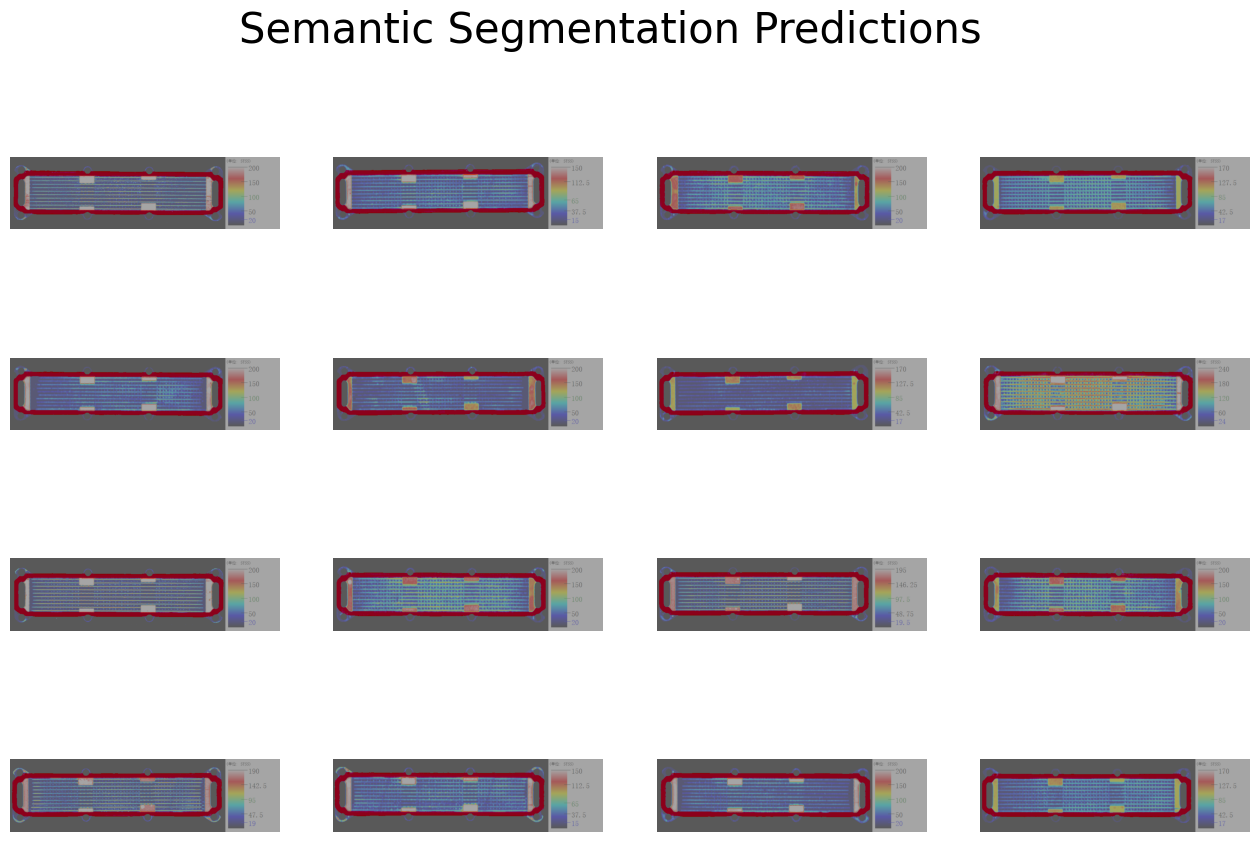

In [24]:
# n 行 n 列可视化
n = 4

fig, axes = plt.subplots(nrows=n, ncols=n, figsize=(16, 10))

for i, file_name in enumerate(os.listdir()[:n**2]):
    
    img_bgr = cv2.imread(file_name)
    
    # 可视化
    axes[i//n, i%n].imshow(img_bgr[:,:,::-1])
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Semantic Segmentation Predictions', fontsize=30)
# plt.tight_layout()
plt.savefig('../K3.jpg')
plt.show()

## 注意：用于预测的图片，不能是训练集中的图片